In [101]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [102]:
# load voting data
data = pickle.load(open("voting_data.pkl", "rb"))

# create color palette based on party
palette = {"AfD": "lightblue",
           "FDP": "yellow",
           "CDU/CSU": "black",
           "Bündnis 90/Die Grünen": "green",
           "SPD": "red",
           "fraktionslos": "gray",
           "Die Linke": "pink"}

# evaluate votes
for member in data:

    # add color to member
    member["color"] = palette[member["party"]]

    # create variables to store answer type count
    count = 0
    yes = 0
    no = 0
    abstention = 0
    absent = 0

    # iterate through votes
    for vote in member["votes"]:

        #increase vote count
        count += 1

        #evaluate vote
        if vote["vote"] == "Ja":
            yes += 1
        elif vote["vote"] == "Nein":
            no += 1
        elif vote["vote"] == "Enthalten":
            abstention += 1
        elif vote["vote"] == "Nicht abg.                                                    ":
            absent += 1
        else:
            print(f"Error for evaluation of vote of {member['name']} on {vote['topic']} from {vote['date']}")

    # add variables to member
    member["votes_count"] = count
    member["votes_yes"] = yes
    member["votes_no"] = no
    member["votes_abstention"] = abstention
    member["votes_absent"] = absent
    member["votes_cast"] = yes + no
    member["votes_present"] = yes + no + abstention
    member["votes_present_share"] = (yes + no + abstention)/count

# convert data to pandas df
df = pd.DataFrame(data)

Error for evaluation of vote of Dr. Alexander Gauland on Bundeszentralregistergesetz from 20.10.2022
Error for evaluation of vote of Dr. Alexander Gauland on Bundeswehrbeschaffungsbeschleunigungsgesetz (Entschließungsantrag CDU/CSU) from 07.07.2022
Error for evaluation of vote of Dr. Alexander Gauland on 07.07.2022: Bereithaltung von Ersatzkraftwerken (Beschlussempfehlung) from 07.07.2022
Error for evaluation of vote of Dr. Alexander Gauland on 07.07.2022: Bereithaltung von Ersatzkraftwerken (Änderungsantrag CDU/CSU) from 07.07.2022
Error for evaluation of vote of Dr. Alexander Gauland on Bereithaltung von Ersatzkraftwerken (Änderungsantrag CDU/CSU) from 07.07.2022
Error for evaluation of vote of Dr. Alexander Gauland on Schuldenregel des Grundgesetzes from 03.06.2022
Error for evaluation of vote of Dr. Alexander Gauland on Impfpflicht gegen SARS-CoV-2 (Gruppe Baehrens/Janecek u.a.) from 07.04.2022
Error for evaluation of vote of Dr. Alexander Gauland on Stärkung der Impfprävention geg

### Which members of the Bundestag were present the most?

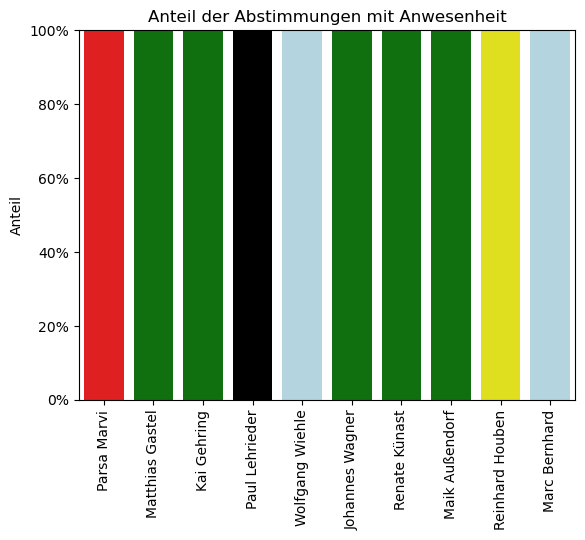

In [103]:
# order by votes_present_share and plot top 10
top = df.sort_values("votes_present_share", ascending = False).head(10)

# create chart area
fig, ax = plt.subplots()

# create bar chart
sns.barplot(x = "name",
            y = "votes_present_share",
            palette = top["color"],
            data = top,
            ax = ax)

# set title & modify axis labels
ax.set_title("Anteil der Abstimmungen mit Anwesenheit")
ax.set_ylabel("Anteil")
ax.set_xlabel(None)

# modify y axis
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# modify x axis
ax.set_xticklabels(labels = top["name"], rotation = 90)

# show plot
plt.show()

### Which members of the Bundestag were present the least?

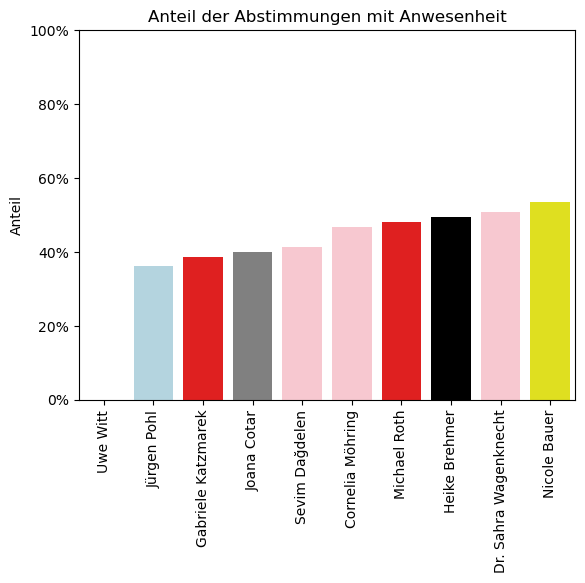

In [104]:
# order by votes_present_share and plot top 10
bottom = df.sort_values("votes_present_share", ascending = True).head(10)

# create chart area
fig, ax = plt.subplots()

# create bar chart
sns.barplot(x = "name",
            y = "votes_present_share",
            palette = bottom["color"],
            data = bottom,
            ax = ax)

# set title & modify axis labels
ax.set_title("Anteil der Abstimmungen mit Anwesenheit")
ax.set_ylabel("Anteil")
ax.set_xlabel(None)

# modify y axis
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# modify x axis
ax.set_xticklabels(labels = bottom["name"], rotation = 90)

# show plot
plt.show()

### The members of which party of the Bundestag were present the most?

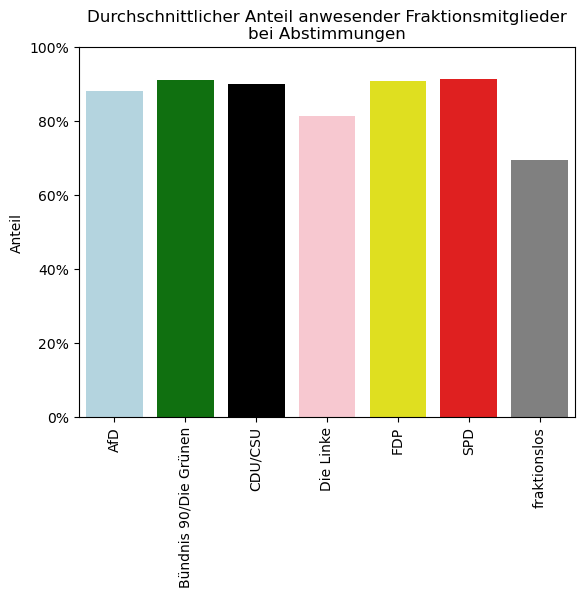

In [105]:
# aggregate on party level
top = df.groupby(["party", "color"], as_index = False).agg({"votes_present_share": "mean"})

# create chart area
fig, ax = plt.subplots()

# create bar chart
sns.barplot(x = "party",
            y = "votes_present_share",
            palette = top["color"],
            data = top,
            ax = ax)

# set title & modify axis labels
ax.set_title("Durchschnittlicher Anteil anwesender Fraktionsmitglieder\nbei Abstimmungen")
ax.set_ylabel("Anteil")
ax.set_xlabel(None)

# modify y axis
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# modify x axis
ax.set_xticklabels(labels = top["party"], rotation = 90)

# show plot
plt.show()